# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
from scipy.stats import linregress
from datetime import datetime

sys.path.append('../api_keys.py')

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # format the date
        date_format = datetime.utcfromtimestamp(city_date).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"An error occurred for {city}: {str(e)}.Skipping")
        #print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sorong
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | ujae
Processing Record 6 of Set 1 | bel ombre
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | cogealac
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | stephenville
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | san pedro pochutla
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | ottumwa
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | utrik
Processing Recor

Processing Record 38 of Set 4 | novodvinsk
Processing Record 39 of Set 4 | betio village
Processing Record 40 of Set 4 | valle de la pascua
Processing Record 41 of Set 4 | berezovyy
Processing Record 42 of Set 4 | booneville
Processing Record 43 of Set 4 | canutama
Processing Record 44 of Set 4 | vadso
Processing Record 45 of Set 4 | new norfolk
Processing Record 46 of Set 4 | colby
Processing Record 47 of Set 4 | vilyuchinsk
Processing Record 48 of Set 4 | prince rupert
Processing Record 49 of Set 4 | saint-francois
Processing Record 0 of Set 5 | lanzhou
Processing Record 1 of Set 5 | st. john's
Processing Record 2 of Set 5 | shalqar
Processing Record 3 of Set 5 | choix
Processing Record 4 of Set 5 | mahina
Processing Record 5 of Set 5 | touros
Processing Record 6 of Set 5 | igarka
Processing Record 7 of Set 5 | goundi
Processing Record 8 of Set 5 | badger
Processing Record 9 of Set 5 | grajau
Processing Record 10 of Set 5 | val-d'or
Processing Record 11 of Set 5 | yokadouma
Processin

Processing Record 23 of Set 8 | ouani
Processing Record 24 of Set 8 | beaufort west
Processing Record 25 of Set 8 | sisimiut
Processing Record 26 of Set 8 | agat village
Processing Record 27 of Set 8 | san julian
Processing Record 28 of Set 8 | gobabis
Processing Record 29 of Set 8 | carauari
Processing Record 30 of Set 8 | wenceslau braz
Processing Record 31 of Set 8 | coahuayana de hidalgo
Processing Record 32 of Set 8 | tanjung pandan
Processing Record 33 of Set 8 | east london
Processing Record 34 of Set 8 | malabar
Processing Record 35 of Set 8 | higuera de zaragoza
Processing Record 36 of Set 8 | neyshabur
Processing Record 37 of Set 8 | constantia
Processing Record 38 of Set 8 | woodward
Processing Record 39 of Set 8 | teknaf
Processing Record 40 of Set 8 | chui
Processing Record 41 of Set 8 | nogliki
Processing Record 42 of Set 8 | kampli
Processing Record 43 of Set 8 | conceicao do araguaia
Processing Record 44 of Set 8 | palikir - national government center
Processing Record 

Processing Record 5 of Set 12 | shahrud
Processing Record 6 of Set 12 | tralee
Processing Record 7 of Set 12 | strelka
Processing Record 8 of Set 12 | wyszkow
Processing Record 9 of Set 12 | san rafael del sur
Processing Record 10 of Set 12 | miramar
Processing Record 11 of Set 12 | huarmey
Processing Record 12 of Set 12 | al muwayh
Processing Record 13 of Set 12 | valbo
Processing Record 14 of Set 12 | chittarkonda
Processing Record 15 of Set 12 | wainwright
Processing Record 16 of Set 12 | zemio
Processing Record 17 of Set 12 | cobram
Processing Record 18 of Set 12 | lautoka
Processing Record 19 of Set 12 | berdigestyakh
Processing Record 20 of Set 12 | aasiaat
Processing Record 21 of Set 12 | ngambe
Processing Record 22 of Set 12 | pampa
Processing Record 23 of Set 12 | turpan
Processing Record 24 of Set 12 | kenai
Processing Record 25 of Set 12 | old shinyanga
Processing Record 26 of Set 12 | tabuk
Processing Record 27 of Set 12 | yuzhno-kurilsk
Processing Record 28 of Set 12 | man

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
#Convert the date from Unix to yyyy-mm-dd
city_data_df['Date']=pd.to_datetime(city_data_df['Date'], unit= 's').dt.date 

# Display sample data=
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sorong,-0.8833,131.2500,78.21,87,99,7.29,ID,2023-11-09
1,albany,42.6001,-73.9662,47.64,75,100,1.01,US,2023-11-09
2,port-aux-francais,-49.3500,70.2167,41.54,99,100,26.75,TF,2023-11-09
3,waitangi,-43.9535,-176.5597,47.88,62,73,32.23,NZ,2023-11-09
4,ujae,8.9322,165.7642,82.99,78,87,21.34,MH,2023-11-09


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sorong,-0.8833,131.2500,78.21,87,99,7.29,ID,2023-11-09
1,albany,42.6001,-73.9662,47.64,75,100,1.01,US,2023-11-09
2,port-aux-francais,-49.3500,70.2167,41.54,99,100,26.75,TF,2023-11-09
3,waitangi,-43.9535,-176.5597,47.88,62,73,32.23,NZ,2023-11-09
4,ujae,8.9322,165.7642,82.99,78,87,21.34,MH,2023-11-09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

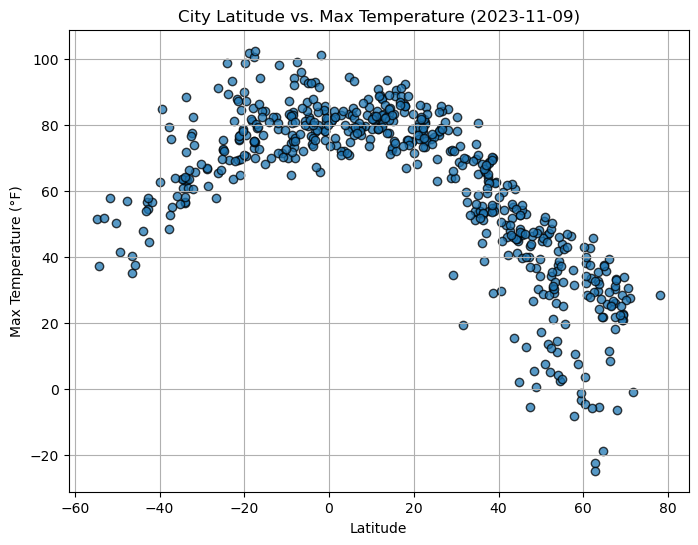

In [8]:
# Build scatter plot for latitude vs. temperature

# Get the date from the first city in your data 
date = city_data_df.loc[0,"Date"]

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

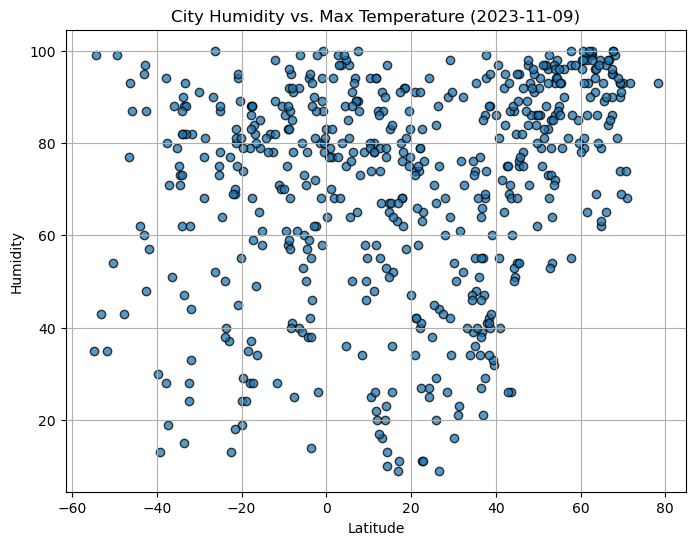

In [9]:
# Build the scatter plots for latitude vs. humidity
date = city_data_df.loc[0,"Date"]

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Humidity vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

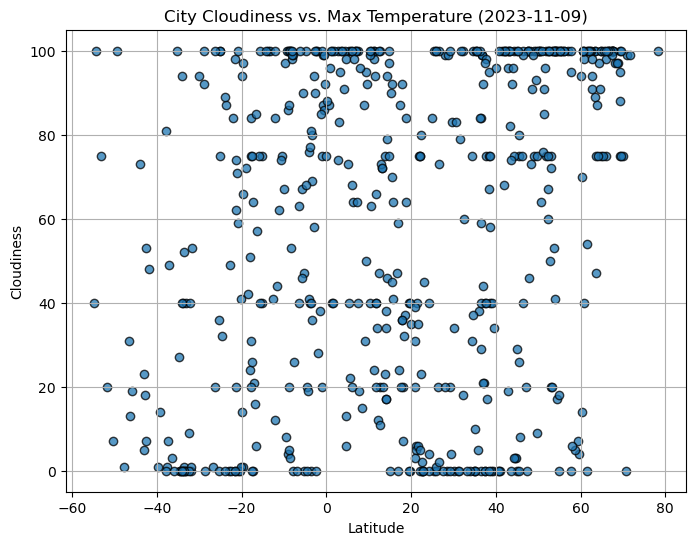

In [10]:
# Build the scatter plots for latitude vs. cloudiness

date = city_data_df.loc[0,"Date"]

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Cloudiness vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

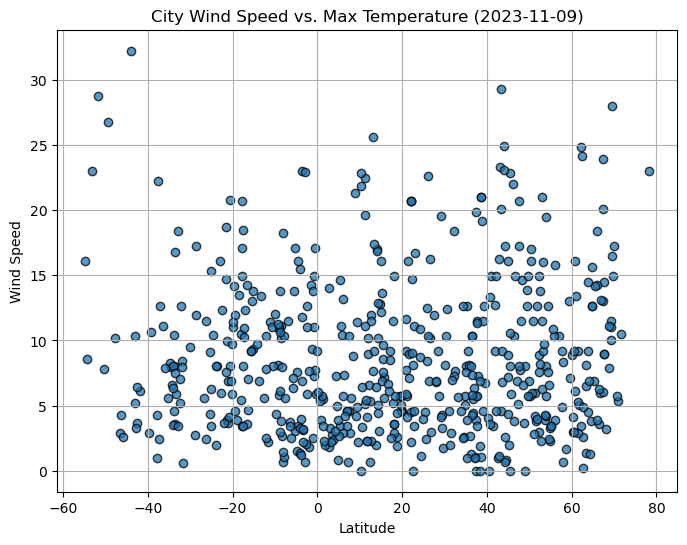

In [11]:
# Build the scatter plots for latitude vs. wind speed
date = city_data_df.loc[0,"Date"]

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Wind Speed vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    # Calculate the regression values
    regress_values = x * slope + intercept

    # Create the linear regression line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create the scatter plot
    plt.scatter(x, y, edgecolors="black", alpha=0.75)
    
    # Plot the regression line
    plt.plot(x, regress_values, "r-")

    # Annotate the linear regression equation and correlation coefficient
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="black")
    plt.annotate(f"r-squared: {round(rvalue**2, 2)}", (min(x), min(y)), fontsize=15, color="black")

    # Set the labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

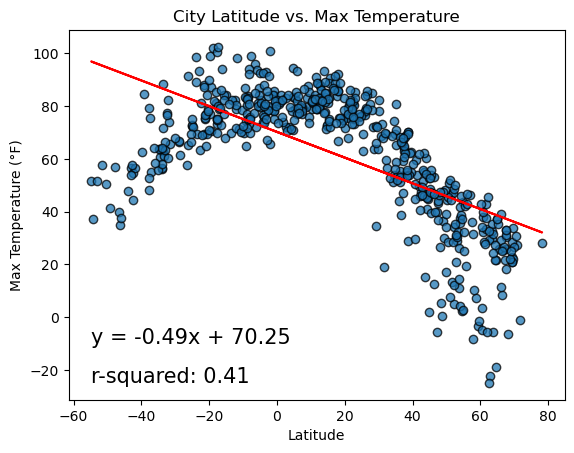

In [13]:
# Linear Regression for lat vs max temp
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (°F)", "City Latitude vs. Max Temperature", (-55, -10))
plt.show()

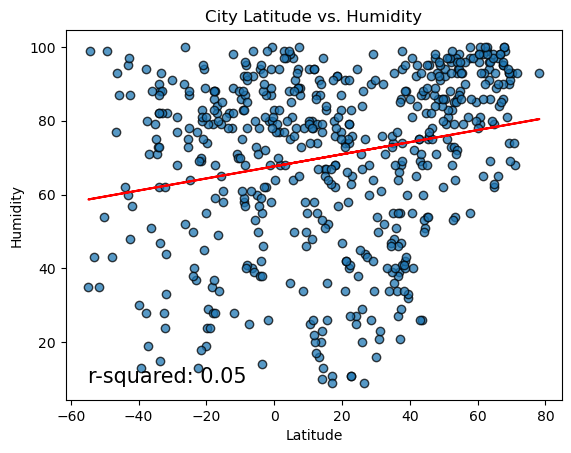

In [14]:
# Linear Regression for lat vs humidity
plot_linear_regression(city_data_df["Lat"], city_data_df["Humidity"], "Latitude", "Humidity", "City Latitude vs. Humidity", (25, 0))
plt.show()

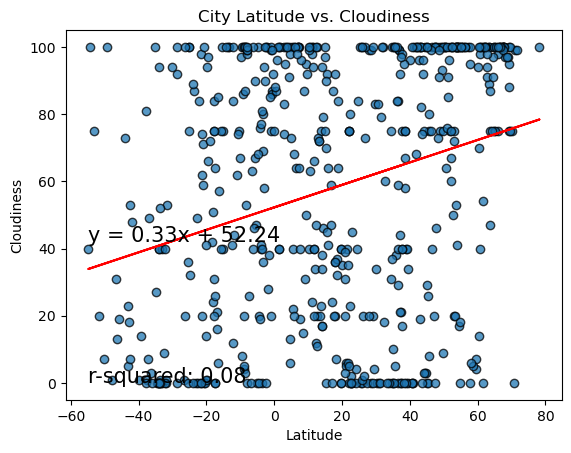

In [15]:
# Linear Regression for lat vs cloudiness
plot_linear_regression(city_data_df["Lat"], city_data_df["Cloudiness"], "Latitude", "Cloudiness", "City Latitude vs. Cloudiness", (-55,42))
plt.show()

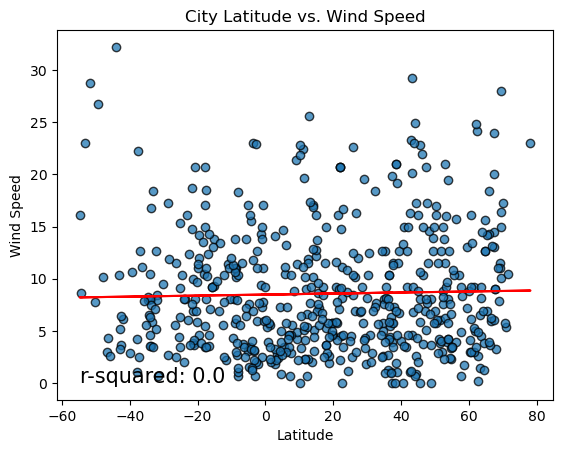

In [16]:
# Linear Regression for lat vs Wind Speed
plot_linear_regression(city_data_df["Lat"], city_data_df["Wind Speed"], "Latitude", "Wind Speed", "City Latitude vs. Wind Speed", (-55,35))
plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,47.64,75,100,1.01,US,2023-11-09
4,ujae,8.9322,165.7642,82.99,78,87,21.34,MH,2023-11-09
7,qaqortoq,60.7167,-46.0333,32.13,79,98,6.15,GL,2023-11-09
8,georgetown,5.4112,100.3354,79.02,97,40,3.44,MY,2023-11-09
9,cogealac,44.5500,28.5667,44.64,51,3,0.83,RO,2023-11-09


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sorong,-0.8833,131.2500,78.21,87,99,7.29,ID,2023-11-09
2,port-aux-francais,-49.3500,70.2167,41.54,99,100,26.75,TF,2023-11-09
3,waitangi,-43.9535,-176.5597,47.88,62,73,32.23,NZ,2023-11-09
5,bel ombre,-4.6167,55.4167,82.24,78,20,3.44,SC,2023-11-09
6,blackmans bay,-43.0167,147.3167,56.52,95,5,5.17,AU,2023-11-09


###  Temperature vs. Latitude Linear Regression Plot

In [19]:
# Define a function to create Linear Regression by hemisphere

def perform_linear_regression(hemisphere_df, xlabel, ylabel, title,text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(hemisphere_df['Lat'], hemisphere_df[ylabel])

    # Calculate the regression values
    regress_values = hemisphere_df['Lat'] * slope + intercept

    # Create the linear regression line equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create the scatter plot
    plt.scatter(hemisphere_df['Lat'], hemisphere_df[ylabel], edgecolors="black", alpha=0.75)
    
    # Plot the regression line
    plt.plot(hemisphere_df['Lat'], regress_values, "r-")

    # Annotate the linear regression equation and correlation coefficient
    plt.annotate(line_eq, (text_coordinates[0], text_coordinates[1] + 50), fontsize=15, color="black")
    plt.annotate(f"r-squared: {round(rvalue**2, 2)}", (min(hemisphere_df['Lat']), min(hemisphere_df[ylabel])), fontsize=15, color="black")

    # Set the labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    

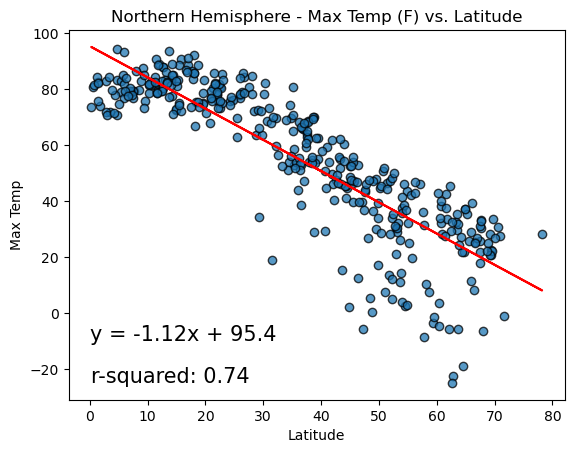

In [20]:
# Linear regression on Northern Hemisphere
perform_linear_regression(northern_hemi_df, 'Latitude', 'Max Temp', 'Northern Hemisphere - Max Temp (F) vs. Latitude', (0,-60))

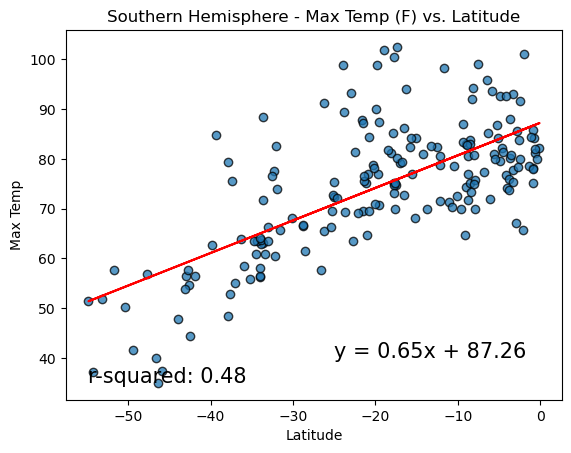

In [21]:
# Linear regression on Southern Hemisphere
perform_linear_regression(southern_hemi_df, 'Latitude', 'Max Temp', 'Southern Hemisphere - Max Temp (F) vs. Latitude', (-25,-10))

**Discussion about the linear relationship:** 
The Northern hemisphere, which starts at 0° and increases in latitude toward the North Pole. The correlation between temperature and latitude makes sense. The left side of the plot indicates the equator, where the temperature is high, as the regression line moves to the right or toward the North Pole the temperature decreases. 

This correlation is true for the Southern hemisphere but only reversed. This is shown in the next plot. The Southern hemisphere starts at a latitude of 0° and decreases in latitude toward the South Pole. The plot shows the lower temperatures on the left side, and increasing as the regression line moves to the right or towards the equator.

### Humidity vs. Latitude Linear Regression Plot

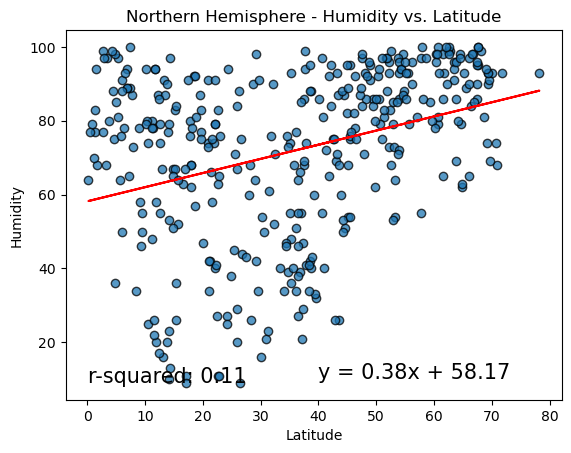

In [22]:
# Northern Hemisphere
perform_linear_regression(northern_hemi_df, 'Latitude', 'Humidity', 'Northern Hemisphere - Humidity vs. Latitude', (40,-40))

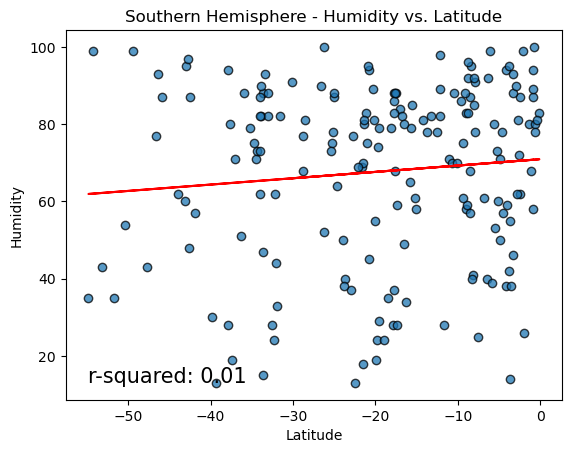

In [23]:
# Southern Hemisphere
perform_linear_regression(southern_hemi_df, 'Latitude', 'Humidity', 'Southern Hemisphere - Humidity vs. Latitude', (-25,-50))

**Discussion about the linear relationship:** 
Looking at the regression lines for humidity vs latitude. Both plots have a very low r-squared value, with the Southern hemisphere having a 0 r-squared value. The correlation in the Southern hemisphere makes sense as that region has the impression of being humid. I’m surprised to see a high correlation in the Northern hemisphere. As the regression line approaches the North Pole, the humidity is close to 100%. The North Pole is not a place one would think to be very humid.

### Cloudiness vs. Latitude Linear Regression Plot

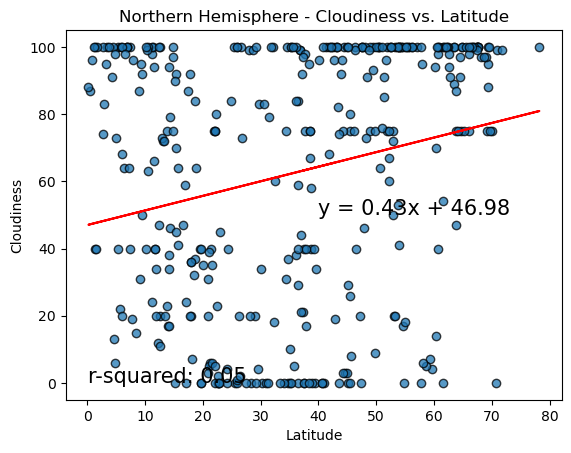

In [24]:
# Northern Hemisphere
perform_linear_regression(northern_hemi_df, 'Latitude', 'Cloudiness', 'Northern Hemisphere - Cloudiness vs. Latitude', (40,0))

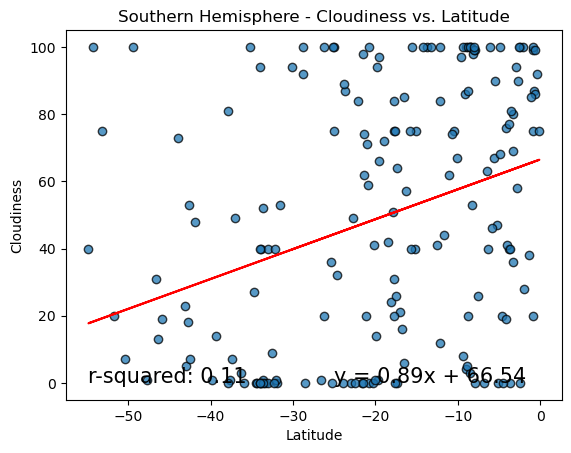

In [25]:
# Southern Hemisphere
perform_linear_regression(southern_hemi_df, 'Latitude', 'Cloudiness', 'Southern Hemisphere - Cloudiness vs. Latitude', (-25,-50))

**Discussion about the linear relationship:** 
Cloudiness vs latitude has some interesting correlations. The equator is almost 100% cloudy as is the North Pole, however the South Pole is almost always clear. 

### Wind Speed vs. Latitude Linear Regression Plot

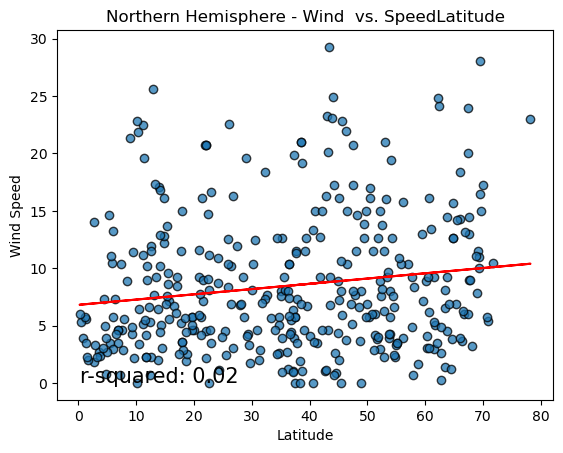

In [26]:
# Northern Hemisphere
perform_linear_regression(northern_hemi_df, 'Latitude', 'Wind Speed', 'Northern Hemisphere - Wind  vs. SpeedLatitude', (0,-15))

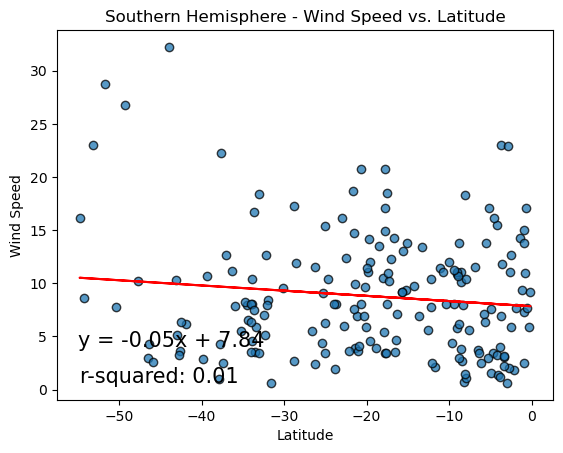

In [27]:
# Southern Hemisphere
perform_linear_regression(southern_hemi_df, 'Latitude', 'Wind Speed', 'Southern Hemisphere - Wind Speed vs. Latitude', (-55,-46))

**Discussion about the linear relationship:** 
Wind Speed plotted against latitude shows the Northern hemisphere having tight range of wind speed, with the Southern hemisphere having more scattered values. Additionally, the Southern hemisphere appears to have more points of higher wind speed as opposed to the Northern hemisphere, where the range greatly under 10.